In [2]:
import math
from numpy import  concatenate
import os
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from pandas.core.algorithms import mode
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.python.keras.backend import concatenate
from sklearn.metrics import mean_squared_error
from tensorflow.python.keras.callbacks import History
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, LSTM,Dropout
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor

ModuleNotFoundError: No module named 'tensorflow'

In [3]:
path=os.path.abspath('.')

In [4]:
os.chdir("D:\学习材料\数学\数学建模与实验\美赛\美赛进行时\\2023\\2023_MCM-ICM_Problems")

In [5]:
df=pd.read_excel("c.xlsx",parse_dates=["Date"],index_col=[0])

In [6]:
df.head()

,Contest number,Word,Number of reported results,Number in hard mode,1 try,2 tries,3 tries,4 tries,5 tries,6 tries,...,q,r,s,t,u,v,w,x,y,z
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-07,202,slump,80630,1362,1,3,23,39,24,9,...,0.00000,0.000000,0.126405,0.0,0.152782,0.0,0.0,0.0,0.000000,0.0
2022-01-08,203,crank,101503,1763,1,5,23,31,24,14,...,0.00000,0.088472,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
2022-01-09,204,gorge,91477,1913,1,3,13,27,30,22,...,0.00000,0.088472,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
2022-01-10,205,query,107134,2242,1,4,16,30,30,17,...,0.35563,0.088472,0.000000,0.0,0.152782,0.0,0.0,0.0,0.154195,0.0
2022-01-11,206,drink,153880,3017,1,9,35,34,16,5,...,0.00000,0.088472,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0


In [7]:
test_split=round(len(df)*0.20)

In [8]:
df.shape

(359, 42)

In [9]:
df_for_training=df[:-72]
df_for_testing=df[-72:]

In [66]:
df=pd.read_excel("c_test.xlsx",parse_dates=["Date"],index_col=[0])

In [68]:
from pandas import DataFrame

from pandas import concat
#数据有监督化——————归一化
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
 """
 Frame a time series as a supervised learning dataset.
 Arguments:
 data: Sequence of observations as a list or NumPy array.
 n_in: Number of lag observations as input (X).
 n_out: Number of observations as output (y).
 dropnan: Boolean whether or not to drop rows with NaN values.
 Returns:
 Pandas DataFrame of series framed for supervised learning.
 """
 n_vars = 1 if type(data) is list else data.shape[1]
 df = DataFrame(data)
 cols, names = list(), list()
 # input sequence (t-n, ... t-1)
 for i in range(n_in, 0, -1):
    cols.append(df.shift(i))
    names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
 # forecast sequence (t, t+1, ... t+n)
 for i in range(0, n_out):
    cols.append(df.shift(-i))
    if i == 0:
        names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
    else:
        names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
 # put it all together
 agg = concat(cols, axis=1)
 agg.columns = names
 # drop rows with NaN values
 if dropnan:
    agg.dropna(inplace=True)
 return agg

In [12]:
df

,1 try,2 tries,3 tries,4 tries,5 tries,6 tries,7 or more tries (X),is_repetitive,Grade Level,Word Rank,...,q,r,s,t,u,v,w,x,y,z
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-07,1,3,23,39,24,9,1,0,3,15,...,0.00000,0.000000,0.126405,0.0,0.152782,0.000000,0.0,0.0,0.000000,0.0
2022-01-08,1,5,23,31,24,14,2,0,1,7,...,0.00000,0.088472,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
2022-01-09,1,3,13,27,30,22,4,1,1,5,...,0.00000,0.088472,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
2022-01-10,1,4,16,30,30,17,2,0,1,8,...,0.35563,0.088472,0.000000,0.0,0.152782,0.000000,0.0,0.0,0.154195,0.0
2022-01-11,1,9,35,34,16,5,1,0,1,0,...,0.00000,0.088472,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,0,2,17,35,29,14,3,1,4,100,...,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
2022-12-28,0,3,21,40,25,9,1,0,1,5,...,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
2022-12-29,0,2,16,38,30,12,2,0,1,7,...,0.00000,0.000000,0.000000,0.0,0.000000,0.231672,0.0,0.0,0.000000,0.0


In [69]:
#将数据
values= df.values
values=values.astype('float32')

In [70]:
#标准化特征
scaler=MinMaxScaler(feature_range=(0,1))
scaled=scaler.fit_transform(values)
reframed=series_to_supervised(scaled,1,1)
reframed.drop(reframed.columns[range(44,74)],axis=1,inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.166667   0.115385   0.441860   0.736842   0.428571   0.200000   
2   0.166667   0.192308   0.441860   0.526316   0.428571   0.342857   
3   0.166667   0.115385   0.209302   0.421053   0.600000   0.571429   
4   0.166667   0.153846   0.279070   0.500000   0.600000   0.428571   
5   0.166667   0.346154   0.720930   0.605263   0.200000   0.085714   

   var7(t-1)  var8(t-1)  var9(t-1)  var10(t-1)  ...  var35(t-1)  var36(t-1)  \
1   0.020833        0.0   0.666667        0.15  ...         0.0         0.0   
2   0.041667        0.0   0.000000        0.07  ...         0.0         0.0   
3   0.083333        1.0   0.000000        0.05  ...         0.0         0.0   
4   0.041667        0.0   0.000000        0.08  ...         0.0         0.5   
5   0.020833        0.0   0.000000        0.00  ...         0.0         0.0   

   var37(t-1)   var1(t)   var2(t)   var3(t)   var4(t)   var5(t)   var6(t)  \
1         0.0  0.1666

In [71]:
#构建训练集和测试集,选最后72天作为测试集
reframed_values=reframed.values
train_data=reframed_values[:-72]
test_data=reframed_values[-72:]
train_data_x,train_data_y=train_data[:,:-7],train_data[:,-7:]
test_data_x,test_data_y=test_data[:,:-7],test_data[:,-7:]
test_data

array([[0.        , 0.1923077 , 0.5813954 , ..., 0.54285717, 0.42857143,
        0.0625    ],
       [0.        , 0.15384616, 0.32558137, ..., 0.2857143 , 0.11428572,
        0.02083333],
       [0.        , 0.26923078, 0.6511628 , ..., 0.5142857 , 1.        ,
        0.375     ],
       ...,
       [0.        , 0.11538462, 0.39534885, ..., 0.6       , 0.2857143 ,
        0.04166667],
       [0.        , 0.07692308, 0.27906978, ..., 0.4857143 , 0.20000002,
        0.02083333],
       [0.        , 0.15384616, 0.39534885, ..., 0.57142854, 0.2857143 ,
        0.04166667]], dtype=float32)

In [72]:
#将训练集和测试集重构成LSTM预期的形式
train_data_x_input=train_data_x.reshape((train_data_x.shape[0],1,train_data_x.shape[1]))
test_data_x_input=test_data_x.reshape((test_data_x.shape[0],1,test_data_x.shape[1]))

Epoch 1/60
4/4 - 3s - loss: 0.3110 - val_loss: 0.2938 - 3s/epoch - 766ms/step
Epoch 2/60
4/4 - 0s - loss: 0.2843 - val_loss: 0.2692 - 37ms/epoch - 9ms/step
Epoch 3/60
4/4 - 0s - loss: 0.2595 - val_loss: 0.2454 - 38ms/epoch - 10ms/step
Epoch 4/60
4/4 - 0s - loss: 0.2350 - val_loss: 0.2230 - 42ms/epoch - 10ms/step
Epoch 5/60
4/4 - 0s - loss: 0.2121 - val_loss: 0.2022 - 43ms/epoch - 11ms/step
Epoch 6/60
4/4 - 0s - loss: 0.1914 - val_loss: 0.1830 - 38ms/epoch - 10ms/step
Epoch 7/60
4/4 - 0s - loss: 0.1708 - val_loss: 0.1656 - 37ms/epoch - 9ms/step
Epoch 8/60
4/4 - 0s - loss: 0.1540 - val_loss: 0.1513 - 37ms/epoch - 9ms/step
Epoch 9/60
4/4 - 0s - loss: 0.1404 - val_loss: 0.1403 - 38ms/epoch - 9ms/step
Epoch 10/60
4/4 - 0s - loss: 0.1299 - val_loss: 0.1319 - 34ms/epoch - 9ms/step
Epoch 11/60
4/4 - 0s - loss: 0.1237 - val_loss: 0.1267 - 36ms/epoch - 9ms/step
Epoch 12/60
4/4 - 0s - loss: 0.1209 - val_loss: 0.1240 - 36ms/epoch - 9ms/step
Epoch 13/60
4/4 - 0s - loss: 0.1193 - val_loss: 0.1223 - 

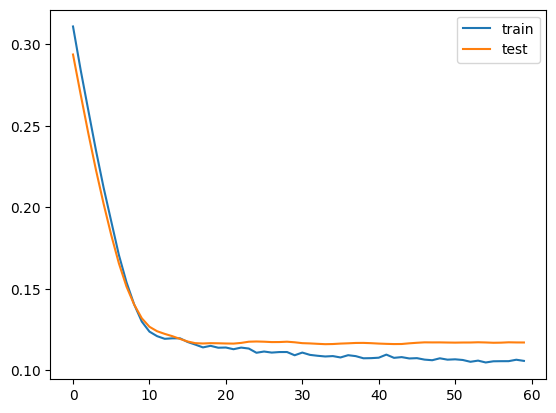

In [112]:
#设计神经网络
LSTMmodel=Sequential()
LSTMmodel.add(LSTM(60,input_shape=(train_data_x_input.shape[1],train_data_x_input.shape[2])))
LSTMmodel.add(Dropout(0.1))
LSTMmodel.add(Dense(7))
LSTMmodel.compile(loss='mae',optimizer='adam')
loss_log=LSTMmodel.fit(train_data_x_input,train_data_y,epochs=60,batch_size=72,validation_data=(test_data_x_input,test_data_y),verbose=2, shuffle=False,)
plt.plot(loss_log.history['loss'],label='train')
plt.plot(loss_log.history['val_loss'],label='test')
plt.legend()
plt.show()

In [43]:
def lstm_predict(model, test_x,test_y):
    test_x_out = test_x
    test_y_out = test_y
    #做出预测
    yhat = model.predict(test_x_out)
    #将测试集上的预测值还原为原来的数据维度
    scale_new = MinMaxScaler()
    scale_new.min_, scale_new.scale_ = scaler.min_[0], scaler.scale_[0]
    inv_yhat = scale_new.inverse_transform(yhat)
    #将测试集上的实际值还原为原来的数据维度
    inv_y = scale_new.inverse_transform(test_y_out)
    return inv_yhat, inv_y


In [60]:
from math import sqrt
import numpy as np
# 计算每一步预测的RMSE
def evaluate_forecasts(test, forecasts, n_out):
    rmse_dic = {}
    for i in range(n_out):
        actual = [float(row[i]) for row in test]
        predicted = [float(forecast[i]) for forecast in forecasts]
        rmse = sqrt(mean_squared_error(actual, predicted))
        rmse_dic['t+' + str(i+1) + ' RMSE'] = rmse
    return rmse_dic
# b=[[0,2,17,37,29,12,2]]
# start = np.concatenate((b,test_data_x_input[0,:]), axis=1)
# print(start)


In [61]:
inv_yhat=lstm_predict(LSTMmodel,test_data_x_input,test_data_y)[0]

print(inv_yhat)

3/3 [==============================] - 0s 2ms/step
[[-0.02312194  0.88074595  2.3089945   3.6039069   2.9074013   1.5207522
   0.33677927]
 [ 0.29050267  1.1356548   2.378053    3.314426    2.598024    1.2569628
   0.20474043]
 [ 0.07500547  1.1217321   2.6651487   3.9922614   2.5030925   1.4435039
   0.24194331]
 [ 0.46028882  1.0430464   1.9696088   2.7977314   2.3394167   1.5705578
   0.35274422]
 [ 0.08015025  0.85431117  1.8886114   3.2820535   2.5133672   1.6441258
   0.2992616 ]
 [ 0.39429298  1.2170331   2.6703787   3.4012601   2.2829103   1.0306728
   0.18512121]
 [-0.07383908  0.8450919   1.9134401   3.3756723   2.4221642   1.6400061
   0.31827405]
 [ 0.45313895  1.294589    2.4490132   3.1958659   2.8851295   1.7465795
   0.30873615]
 [ 0.2369822   1.1377723   2.5175326   3.7392592   3.0337195   1.738144
   0.2521888 ]
 [-0.07037686  0.65918165  2.3218453   3.5860977   2.8759224   1.8938321
   0.35904902]
 [ 0.26547253  0.9547513   2.0256078   2.909499    2.3653219   1.30664

In [98]:
predict_data=pd.read_excel("c_test2.xlsx",parse_dates=["Date"],index_col=[0])
p_data=predict_data[358:]
#将数据
predict_values= p_data.values
predict_values=predict_values.astype('float32')
predict_scaled=scaler.fit_transform(predict_values)
reframed_1=series_to_supervised(predict_scaled,1,1)
reframed_1.drop(reframed_1.columns[range(44,74)],axis=1,inplace=True)
reframed_1_values=reframed_1.values
predict_data_x,predict_data_y=reframed_1_values[:,:-7],reframed_1_values[:,-7:]
predict_data_x_input=predict_data_x.reshape((predict_data_x.shape[0],1,predict_data_x.shape[1]))
pre_y=lstm_predict(LSTMmodel,predict_data_x_input,predict_data_y)[0]
pre_y


[[0. 1. 1. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
    var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1         0.0        1.0        1.0        1.0        1.0        1.0   
2         0.0        0.0        0.0        0.0        0.0        0.0   
3         0.0        0.0        0.0        0.0        0.0        0.0   
4         0.0        0.0        0.0        0.0        0.0        0.0   
5         0.0        0.0        0.0        0.0        0.0        0.0   
6         0.0        0.0        0.0        0.0        0.0        0.0   
7         0.0        0.0        0.0        0.0        0.0        0.0   
8         0.0        0.0        0.0        0.0        0.0        0.0   
9         0.0        0.0        0.0        0.0        0.0        0.0   
10        0.0        0.0        0.0        0.0        0.0        0.0   
11        0.0        0.0        0.0        0.0      

array([[ 1.37298554e-01,  3.78117085e-01,  7.67549455e-01,
         1.12046719e+00,  9.51488733e-01,  6.10187948e-01,
         1.12563692e-01],
       [ 2.75427476e-02,  2.33698338e-01,  4.22388315e-01,
         5.81730604e-01,  3.73606861e-01,  1.55070335e-01,
         2.83205919e-02],
       [ 6.33717934e-03,  1.56695858e-01,  3.60892862e-01,
         5.17929077e-01,  2.78145939e-01,  1.10925287e-01,
         3.33717093e-02],
       [-8.74368995e-02,  1.86424196e-01,  3.30513090e-01,
         4.79955882e-01,  2.39529282e-01,  1.16709851e-01,
         2.04109401e-02],
       [ 5.65744266e-02,  1.65965825e-01,  2.25941569e-01,
         4.87636447e-01,  4.50542748e-01,  3.27725619e-01,
         3.70280705e-02],
       [-2.13216990e-02,  2.50393361e-01,  3.76834810e-01,
         5.90642512e-01,  3.42260569e-01,  1.86508477e-01,
         3.64806578e-02],
       [ 2.68166456e-02,  1.01686761e-01,  2.78829783e-01,
         4.12074357e-01,  2.58536756e-01,  1.21344000e-01,
         1.7925871

In [111]:
#预测结果重新分配
p_y=pre_y
p_y[p_y<0]=0
p_y_sum_list=[]
for i in p_y:
    p_y_sum_list.append(sum(i))
for i in range(p_y.shape[0]):
    for j in range(p_y.shape[1]):
        p_y[i][j]=p_y[i][j]/p_y_sum_list[i]
p_y

array([[3.36708128e-02, 9.27286521e-02, 1.88232243e-01, 2.74781048e-01,
        2.33341128e-01, 1.49641231e-01, 2.76048873e-02],
       [1.51137980e-02, 1.28239542e-01, 2.31781214e-01, 3.19218665e-01,
        2.05012903e-01, 8.50932449e-02, 1.55406324e-02],
       [4.32779361e-03, 1.07010916e-01, 2.46461362e-01, 3.53704721e-01,
        1.89951748e-01, 7.57532269e-02, 2.27902457e-02],
       [0.00000000e+00, 1.35725021e-01, 2.40628093e-01, 3.49429041e-01,
        1.74387872e-01, 8.49699154e-02, 1.48600638e-02],
       [3.23021300e-02, 9.47610065e-02, 1.29005179e-01, 2.78424323e-01,
        2.57245034e-01, 1.87120512e-01, 2.11418066e-02],
       [0.00000000e+00, 1.40424266e-01, 2.11334482e-01, 3.31240952e-01,
        1.91944733e-01, 1.04596682e-01, 2.04588864e-02],
       [2.20311638e-02, 8.35405663e-02, 2.29072079e-01, 3.38538915e-01,
        2.12400377e-01, 9.96899307e-02, 1.47269657e-02],
       [0.00000000e+00, 9.08150226e-02, 1.74434081e-01, 3.09134424e-01,
        2.39280388e-01, 1

In [46]:
inv_y=lstm_predict(LSTMmodel,test_data_x_input,test_data_y)[1]

3/3 [==============================] - 0s 3ms/step


In [47]:
inv_yhat

(72, 7)

In [40]:
rmse_dic=evaluate_forecasts(inv_y,inv_yhat,7)
rmse_dic

{'t+1 RMSE': 1.173433405429987,
 't+2 RMSE': 1.1015967598962482,
 't+3 RMSE': 1.2643100639246763,
 't+4 RMSE': 0.8949316332574658,
 't+5 RMSE': 1.1016615005717076,
 't+6 RMSE': 1.1491481293073167,
 't+7 RMSE': 0.36568252025183}